In [50]:
import m_nn, d_mg5_data
import torch
import pennylane as qml
from pennylane import numpy as np


In [51]:
d = d_mg5_data.FatJetEvents(channel="VzToZhToVevebb", cut_pt=(800, 1000), subjet_radius=0.1, num_pt_ptcs=4)
e = d.generate_uniform_pt_events(bin=10, num_bin_data=10)

DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.1.hdf5
DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.1.hdf5
DataLog: Generate uniform Pt events (1/10) | number of bin events = 10/11075
DataLog: Generate uniform Pt events (2/10) | number of bin events = 10/11328
DataLog: Generate uniform Pt events (3/10) | number of bin events = 10/11761
DataLog: Generate uniform Pt events (4/10) | number of bin events = 10/11922
DataLog: Generate uniform Pt events (5/10) | number of bin events = 10/11775
DataLog: Generate uniform Pt events (6/10) | number of bin events = 10/11568
DataLog: Generate uniform Pt events (7/10) | number of bin events = 10/11036
DataLog: Generate uniform Pt events (8/10) | number of bin events = 10/10258
DataLog: Generate uniform Pt events (9/10) | number of bin events = 10/8917
DataLog: Generate uniform Pt events (10/10) | number of bin events = 10/7399


In [52]:
gnn_idx_qubits = 3
def ctrl_enc_operator(_input, control, control_values):
    qml.Hadamard(wires=gnn_idx_qubits)
    ctrl = qml.ctrl(qml.Rot, control=control, control_values=control_values)
    ctrl(theta=_input[0], phi=_input[1], omega=_input[2], wires=gnn_idx_qubits)

model = m_nn.QuantumDisorderedFCGraph(num_idx_qubits=gnn_idx_qubits, num_nn_qubits=2, num_layers=1, num_reupload=0, ctrl_enc_operator=ctrl_enc_operator, rnd_shuffle_inputs=True)
model.meas

[Identity(wires=[0]) @ Identity(wires=[1]) @ Identity(wires=[2]) @ PauliZ(wires=[3]),
 Identity(wires=[0]) @ Identity(wires=[1]) @ Identity(wires=[2]) @ PauliZ(wires=[4]),
 Identity(wires=[0]) @ Identity(wires=[1]) @ PauliX(wires=[2]) @ PauliZ(wires=[3]),
 Identity(wires=[0]) @ Identity(wires=[1]) @ PauliX(wires=[2]) @ PauliZ(wires=[4]),
 Identity(wires=[0]) @ PauliX(wires=[1]) @ Identity(wires=[2]) @ PauliZ(wires=[3]),
 Identity(wires=[0]) @ PauliX(wires=[1]) @ Identity(wires=[2]) @ PauliZ(wires=[4]),
 Identity(wires=[0]) @ PauliX(wires=[1]) @ PauliX(wires=[2]) @ PauliZ(wires=[3]),
 Identity(wires=[0]) @ PauliX(wires=[1]) @ PauliX(wires=[2]) @ PauliZ(wires=[4]),
 PauliX(wires=[0]) @ Identity(wires=[1]) @ Identity(wires=[2]) @ PauliZ(wires=[3]),
 PauliX(wires=[0]) @ Identity(wires=[1]) @ Identity(wires=[2]) @ PauliZ(wires=[4]),
 PauliX(wires=[0]) @ Identity(wires=[1]) @ PauliX(wires=[2]) @ PauliZ(wires=[3]),
 PauliX(wires=[0]) @ Identity(wires=[1]) @ PauliX(wires=[2]) @ PauliZ(wires=[4

(<Figure size 2000x600 with 1 Axes>, <Axes: >)

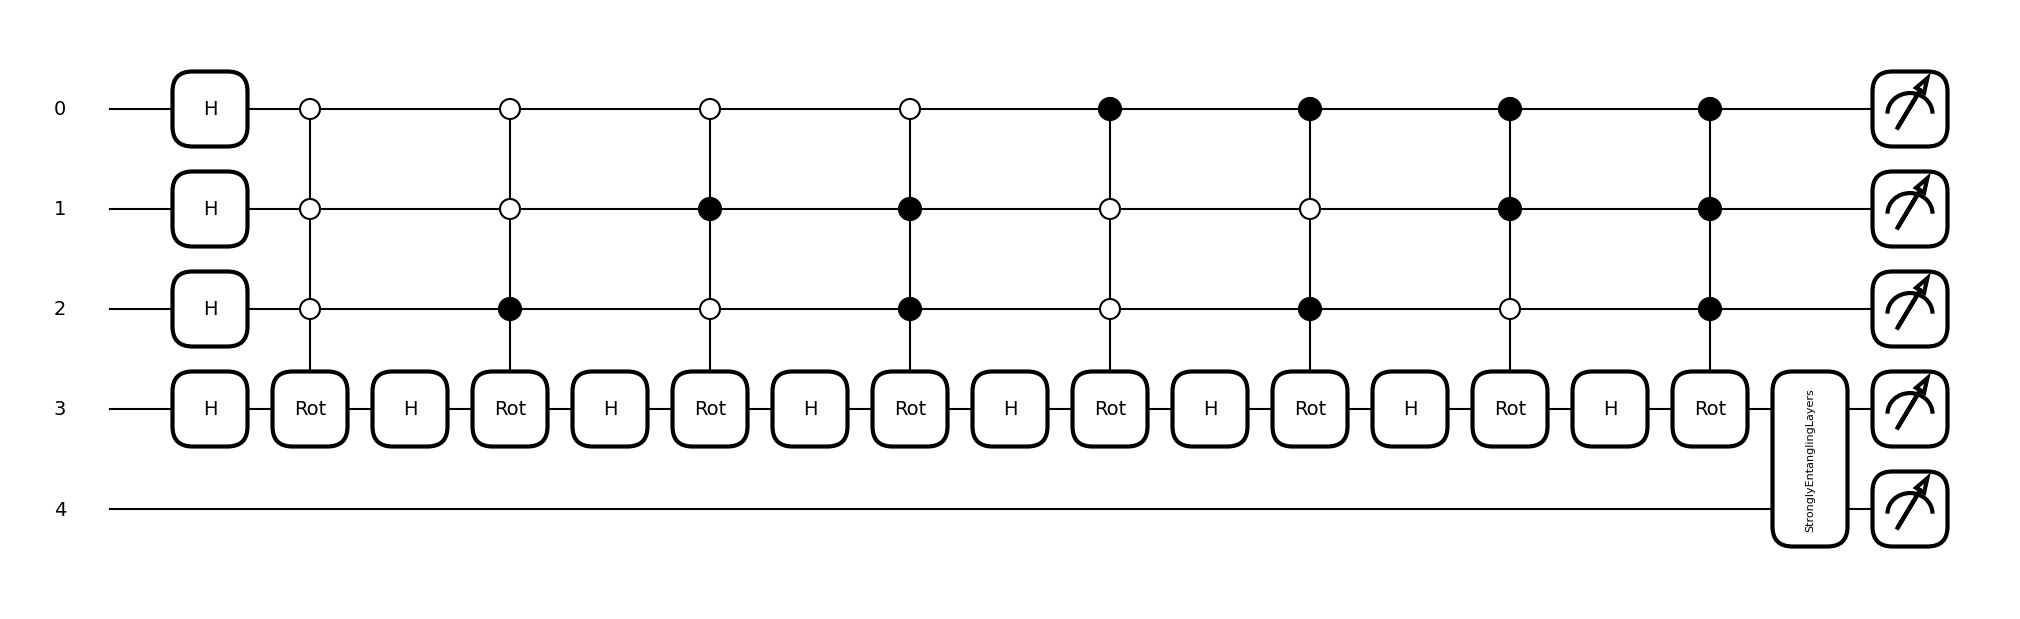

In [53]:
qml.draw_mpl(model.circuit)(torch.rand(2**gnn_idx_qubits,3), torch.rand(1+1, 1, 2, 3))

In [58]:
data = torch.rand(2**gnn_idx_qubits, 3, dtype=torch.float64)
# a = data
# b = data[torch.randperm(2**gnn_idx_qubits)]

# print(a)
# print(model(a.reshape(-1)))

# print("-"*50)

# print(b)
# print(model(b.reshape(-1)))

for _ in range(50):
    # data = data[torch.randperm(2**gnn_idx_qubits)]
    print(model(data.reshape(-1)))

tensor([4.8221, 4.4486], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.8334, 4.1361], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.7968, 4.4002], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.8074, 4.5380], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.8398, 4.5962], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.7979, 4.5057], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.7971, 4.3736], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.8493, 4.5706], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.8182, 4.2268], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.8020, 4.3010], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.8268, 4.3195], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.8035, 4.4011], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.8088, 4.3457], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.8040, 4.2820], dtype=torch.float64, grad_fn=<SumBackward1>)
tensor([4.8046, 4.50